In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from pandas import DataFrame
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot


Una serie AR(p) se puede expresar de la forma donde p es el número de retardos que influye en cada variable

$X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t$

con   $\epsilon_t$ ruido blanco. En delante para la construcción de las series se usará un caso especial de ruido blanco llamado ruido blanco   gaussiano definido como $W_t \sim N(0, \sigma^2)$


que  se puede expresar sin pérdida de generalidad en  desviaciones a las medias (desaparece término constante)

$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t$


$AR(1)\\$
$X_t = \phi X_{t-1} + \epsilon_t$

que de forma general se expresa

$X_t = \sum_{i=1}^{1} \phi_i X_{t-i} + \epsilon_t$



Estacionaria


/home/python/anaconda3/envs/arima/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


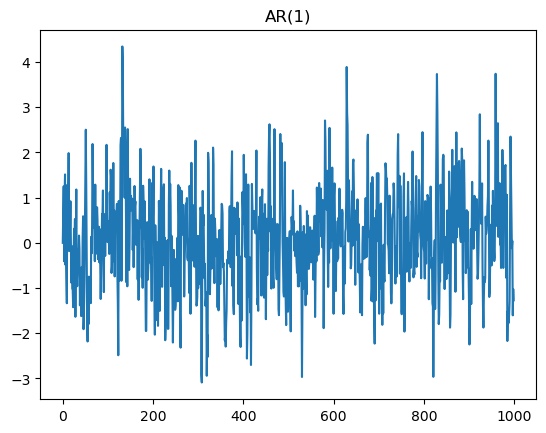

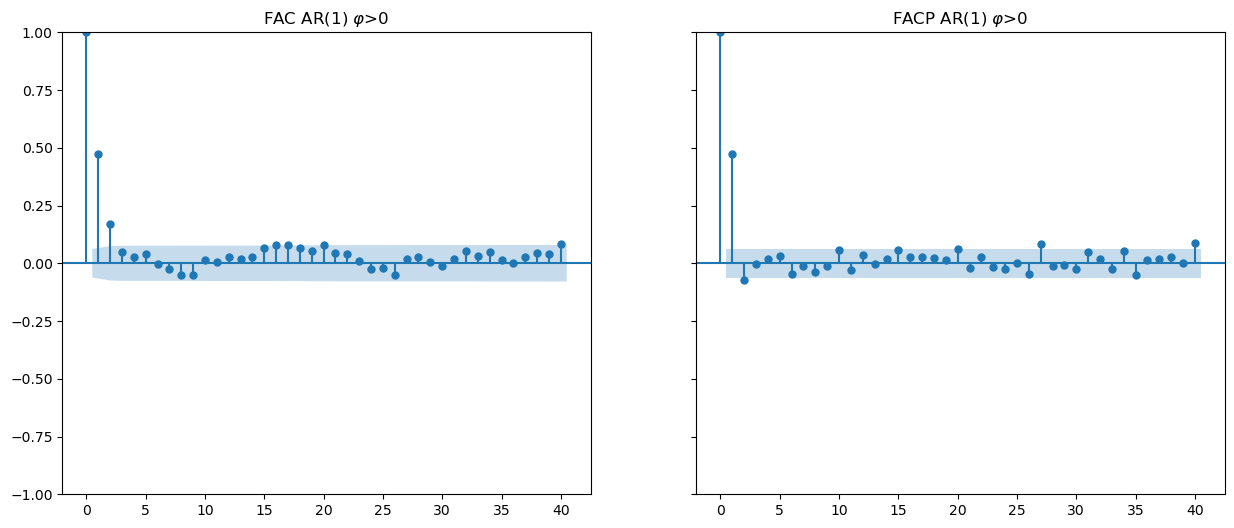

In [2]:

#AR1
n=1000
phi0=0
phi1=0.5
#Inicializar matriz ar1 con ceros
ar1=np.zeros(n)

#Generación de ruido blanco gaussiano N(0,1)
wn=np.random.randn(n)

#Comprobación si es estacionaria  por el valor de Phi 
if abs(phi1)<1:
    print("Estacionaria")
else:
    print("No Estacionaria")

#Condición para el título  del correlograma 
if phi1>0:
    phichar=">0"
else:
    phichar="<0"
#Creacion serie
for i in range(1,n):
    ar1[i]=phi0+ phi1*(ar1[i-1]) + wn[i]
    
#Cálculo Esperanza del proceso
mu=phi0/(1-phi1)
#Graficas    
plt.plot(ar1)
plt.title('AR(1)')

#Correlacion total y parcial con márgenes al 95%
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))

fig=sm.graphics.tsa.plot_acf(ar1, lags=40, ax=ax[0],title=r'FAC AR(1) $\varphi${}'.format(phichar))
fig=sm.graphics.tsa.plot_pacf(ar1,lags=40, ax=ax[1],title=r'FACP AR(1) $\varphi${}'.format(phichar))

Text(0.5, 1.0, 'AR(1)')

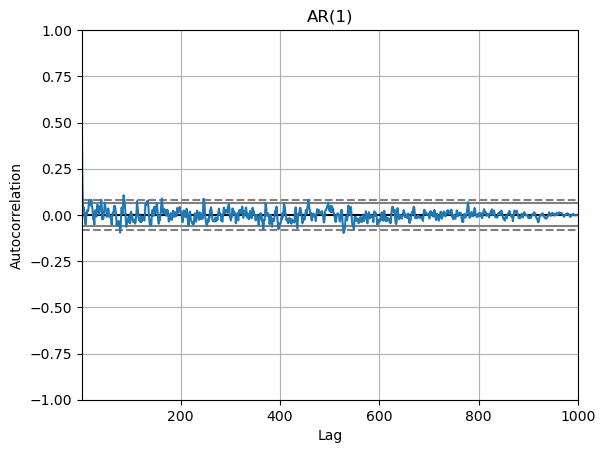

In [3]:
#Otra implementación del correlograma para ver tendencia al aumentar retardos
#Margenes de confianza 95 y 99%
autocorrelation_plot(ar1)
plt.title('AR(1)')


$AR(2)\\$
$X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \epsilon_t$

que de forma general se expresa

$X_t = \sum_{i=1}^{2} \phi_i X_{t-i} + \epsilon_t$



Estacionaria para los valores de phi


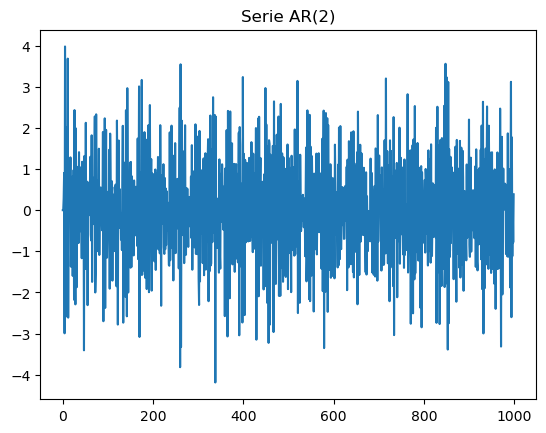

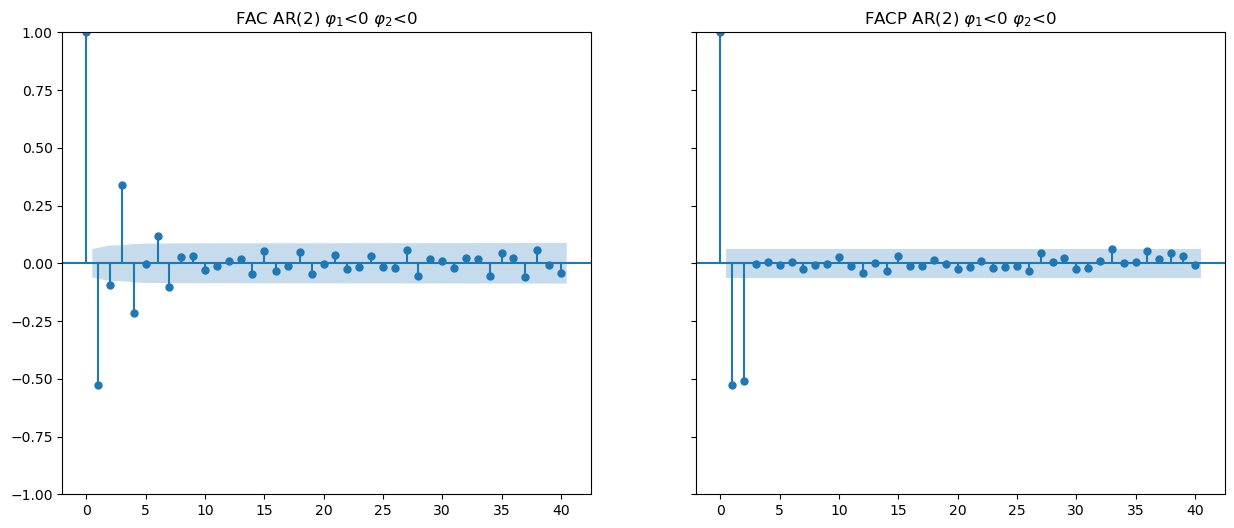

In [4]:
#AR2

# Definimos los parámetros de la serie AR(2)
n=1000
phi0= 0
phi1 = -0.8
phi2 = -0.5
#Inicializar matriz ar1 con ceros
ar2=np.zeros(n)
#Comprobar condiciones de estacionariedad

if (phi2 >-1 and phi2)<1 and phi1+phi2<1 and phi2-phi1<1 :
    print('Estacionaria para los valores de phi')

else:
    print("No estacionaria")
    
#Condición para el título  del correlograma 
    
if phi1>0:
    phi1char=">0"
else:
    phi1char="<0"

if phi2>0:
    phi2char=">0"
else:
    phi2char="<0"

    


# Ruido blanco para el término error
wn = np.random.normal(0, 1, n)



# Generamos los valores de la serie
for i in range(2, n):
      ar2[i] = phi0 + phi1*ar2[i-1] + phi2*ar2[i-2] + wn[i]
    

plt.plot(ar2)
plt.title("Serie AR(2)")

mu=phi0/(1-phi1-phi2)
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))
fig=sm.graphics.tsa.plot_acf(ar2, lags=40, ax=ax[0],title=r'FAC AR(2) $\varphi_1${} $\varphi_2${}'.format(phi1char,phi2char))
fig=sm.graphics.tsa.plot_pacf(ar2,lags=40, ax=ax[1],title=r'FACP AR(2) $\varphi_1${} $\varphi_2${}'.format(phi1char,phi2char))

Text(0.5, 1.0, 'AR(2)')

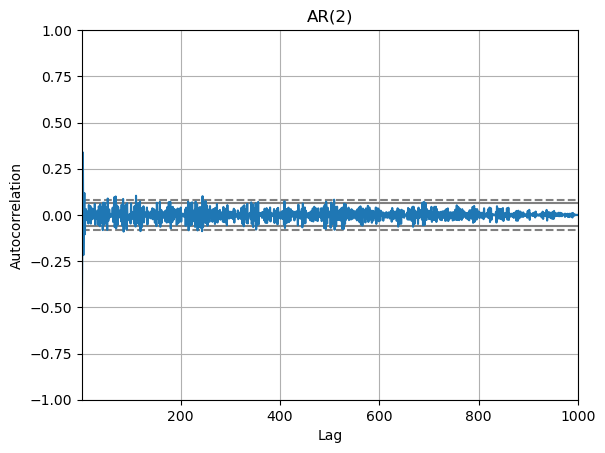

In [5]:
autocorrelation_plot(ar2)
plt.title('AR(2)')

$AR(p)$

$X_t = \sum_{i=1}^{p} \phi_i X_{t-i} + \epsilon_t$


$Simulacion AR(\infty)$


Se hace depender a los n términos de todos sus retardos

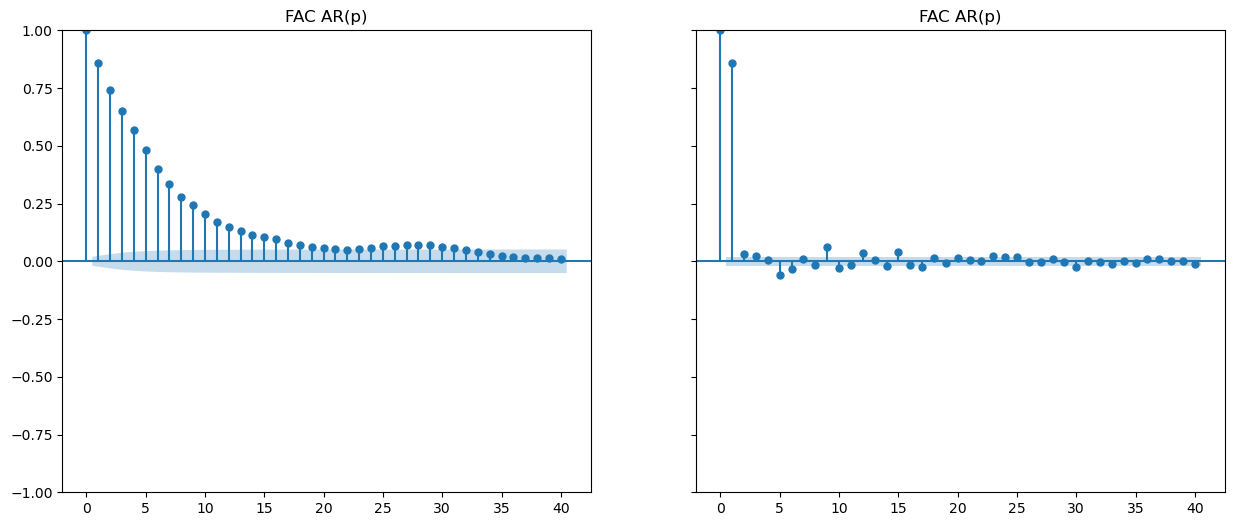

In [6]:
n=10000
#Ruido Blanco gaussiano
wn=np.random.randn(n)
#array de n valores aleatorios para phi entre -1 y 1 
arrphi=np.random.uniform(-1,1,n)
arp=np.zeros(n)
for i in range(0,n):
    arp[i]=wn[i]+np.sum(arp[:i]*arrphi[:i])

#plt.plot(arp)
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15,6))
fig=sm.graphics.tsa.plot_acf(arp,lags=40, ax=ax[0],title='FAC AR(p)')
fig=sm.graphics.tsa.plot_pacf(arp,lags=40, ax=ax[1],title='FAC AR(p)')

   

Text(0.5, 1.0, 'AR(p)')

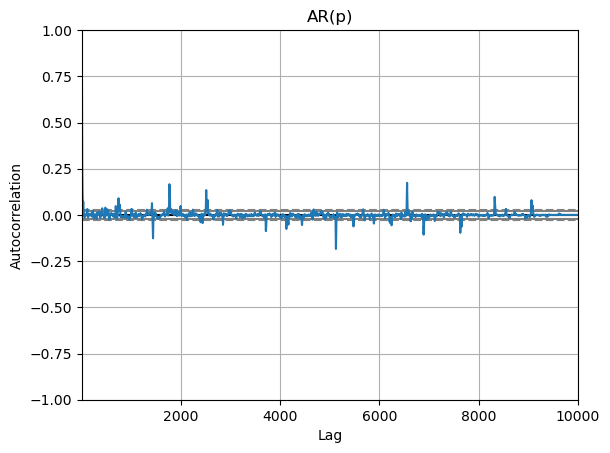

In [7]:
autocorrelation_plot(arp)
plt.title('AR(p)')

AR(p) (y en general cualquier proceso AR) se puede representar como la suma de ruido
blanco ponderada por una constante que decrece geométricamente

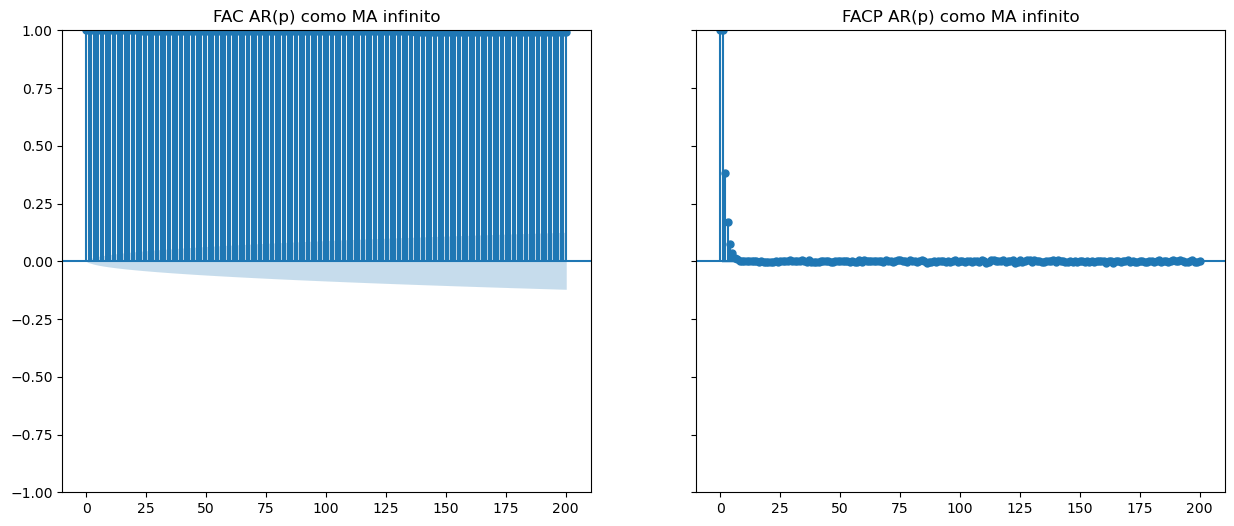

In [8]:
#AR(p) como MA(n)
n=100000
wn=np.random.randn(n)
theta=np.random.uniform(-1,1,n)
arp=np.zeros(n)
for i in range(0,n):
    arp[i]=wn[i]-np.sum(wn[:i]*theta[:i])
fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))
fig=sm.graphics.tsa.plot_acf(arp, lags=200, ax=ax[0],title='FAC AR(p) como MA infinito')
fig=sm.graphics.tsa.plot_pacf(arp,lags=200, ax=ax[1],title='FACP AR(p) como MA infinito') 


Text(0.5, 1.0, 'AR(p)como MA infinito')

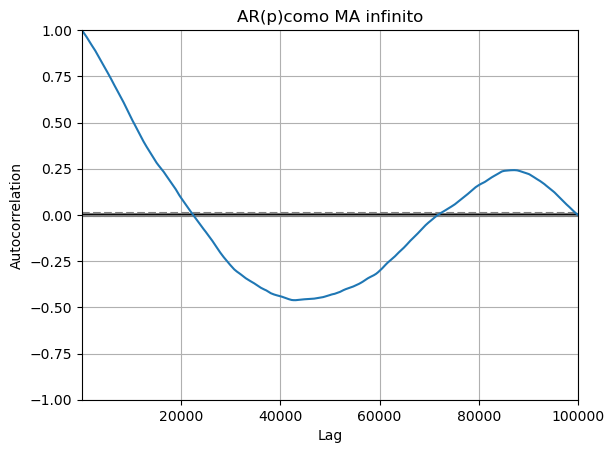

In [9]:
autocorrelation_plot(arp)
plt.title('AR(p)como MA infinito')

AR(1) como la suma de ruido blanco ponderada por una constante que decrece geométricamente

$$z_{t}=\sum_{i=0}^{\infty}\Phi _{1}^{i}\varepsilon _{t-i}$$

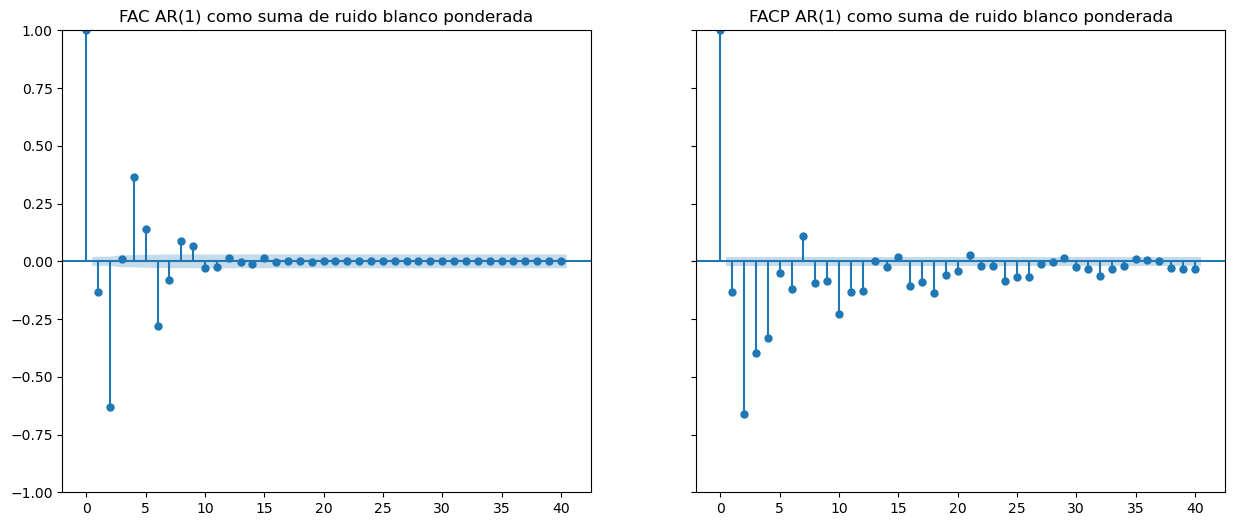

In [10]:
#Ar(1) como suma ponderada de los errores(Se obtiene MA)
n=10000
p=1
phi1=np.random.uniform(-1,1,p)
wn=np.random.normal(0,1,n)
arr1=np.zeros(n)
for i in range(p,n):
    arr1[i]=np.sum(((phi1**i) * wn[i-1]))


fig, ax = plt.subplots(1,2, sharex=True,sharey=True,figsize=(15, 6))
fig=sm.graphics.tsa.plot_acf(arr1, lags=40, ax=ax[0],title='FAC AR(1) como suma de ruido blanco ponderada')
fig=sm.graphics.tsa.plot_pacf(arr1,lags=40, ax=ax[1],title='FACP AR(1) como suma de ruido blanco ponderada')

Text(0.5, 1.0, 'AR(1) como suma de ruido blanco ponderada')

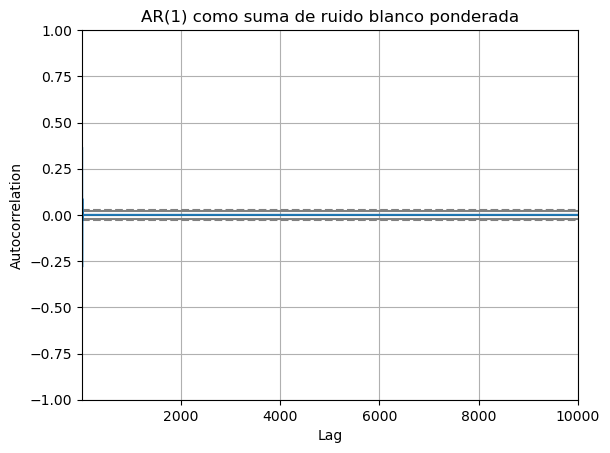

In [11]:
autocorrelation_plot(arr1)
plt.title('AR(1) como suma de ruido blanco ponderada')

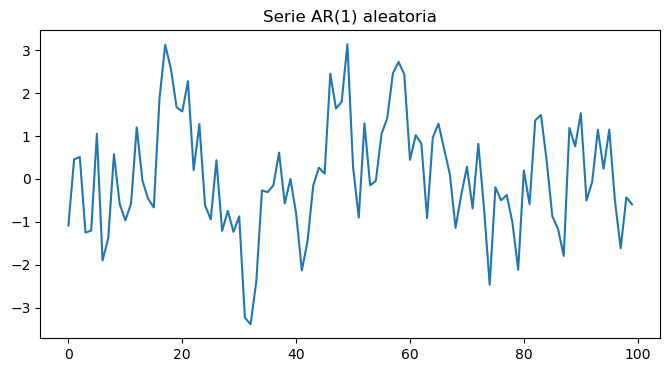

In [12]:
import numpy as np
import statsmodels.api as sm

# Crear una serie AR(1) aleatoria con libreria 
np.random.seed(123)
n = 100
ar_params = np.array([0.5])
ma_params = np.array([])
ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
y = sm.tsa.ArmaProcess(ar, ma).generate_sample(nsample=n)

# Representar la serie en un gráfico
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(y)
ax.set(title="Serie AR(1) aleatoria")
plt.show()